In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Описание данных

In [4]:
df = pd.read_csv("E:\\!docum\\!HSE магистратура\\Задание проект\\данные\\lenta-ru-news\\lenta-ru-news.csv")
df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914/09/16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914/09/16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914/09/17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914/09/17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914/09/18
...,...,...,...,...,...,...
800970,https://lenta.ru/news/2019/12/14/shnur/,Шнуров раскритиковал Гагарину на «Голосе»,Певец Сергей Шнуров раскритиковал свою коллегу...,NaN,ТВ и радио,2019/12/14
800971,https://lenta.ru/news/2019/12/14/dolg/,В России предложили изменить правила взыскания...,Министерство юстиции России предложило изменит...,NaN,Все,2019/12/14
800972,https://lenta.ru/news/2019/12/14/dark_euro/,В России назвали «черную дату» для Европы,Испытание США ранее запрещенной Договором о ли...,NaN,Политика,2019/12/14
800973,https://lenta.ru/news/2019/12/14/meteo/,Россиянам пообещали аномально теплую погоду,В ближайшие дни в европейской части России пог...,NaN,Общество,2019/12/14


In [3]:
# df = pd.read_csv("/Users/kucumovamilana/Downloads/lenta-ru-news.csv", low_memory=False)
# df

## Общие описательные характеристики

In [4]:
df.shape

(800975, 6)

В нашем датасете 800975 строк и 6 колонок:

`url` - ссылка на новость  
`title` - название статьи  
`text` - текст статьи  
`topic` - тема статьи  
`tags` - "подтема" статьи (более узкая, чем предыдущая колонка)  
`date` - дата публикации статьи

Рассмотрим каждую колонку подробнее

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800975 entries, 0 to 800974
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     800975 non-null  object
 1   title   800975 non-null  object
 2   text    800970 non-null  object
 3   topic   738973 non-null  object
 4   tags    773756 non-null  object
 5   date    800975 non-null  object
dtypes: object(6)
memory usage: 36.7+ MB


In [6]:
display(df.isna().sum())

url          0
title        0
text         5
topic    62002
tags     27219
date         0
dtype: int64

Поскольку изучаемые нами данные - текст, тип данных у всех колонок - object. Однако в последней колонке у нас представлены даты, поэтому необходимо будет их преобразовать отдельно

Также в данных есть пропуски.

In [7]:
df.describe(include=['object'])

,url,title,text,topic,tags,date
count,800975,800975,800970,738973,773756,800975
unique,800964,797832,800037,23,94,7393
top,https://lenta.ru/news/2000/10/19/pope/,В Москве объявлено штормовое предупреждение,"РИА ""Новости""",Россия,Все,2019/12/05
freq,2,21,291,160445,453762,284


Из описательных статистик видно, что в данных (особенно интересующая нас переменная text) есть дубли. Посмотрим на них чуть подробнее

In [8]:
ids = df['text']
df_dublicates = df[ids.isin(ids[ids.duplicated()])]
df_dublicates.reset_index(drop=True)

,url,title,text,topic,tags,date
0,https://lenta.ru/news/2001/06/12/barak/,"Фильм ""Барак"" получил Государственную премию","РИА ""Новости""",Культура,Все,2001/06/12
1,https://lenta.ru/news/2001/08/08/spy/,Европейский союз составит досье на антиглобали...,Лидеры стран-участниц Европейского Союза приня...,Мир,Все,2001/08/08
2,https://lenta.ru/news/2001/08/20/spy/,Европейский союз составит досье на антиглобали...,Лидеры стран-участниц Европейского Союза приня...,Мир,Все,2001/08/20
3,https://lenta.ru/news/2002/10/27/final/,В финале St Petersburg Open Южный проиграл Гро...,Французский теннисист Себастьян Грожан (Sebast...,Спорт,Все,2002/10/27
4,https://lenta.ru/news/2002/10/28/tennis/,В финале St Petersburg Open Южный проиграл Гро...,Французский теннисист Себастьян Грожан (Sebast...,Спорт,Все,2002/10/28
...,...,...,...,...,...,...
1065,https://lenta.ru/news/2017/03/27/arcticoil/,Новак назвал Арктику будущим российской нефтед...,Арктика является стратегическим ресурсом Росси...,69-я параллель,Люди,2017/03/27
1066,https://lenta.ru/news/2017/08/22/expenscountry/,Россия заняла второе место после США по числу ...,Во всем мире сегодня продается около 500 объек...,Дом,Город,2017/08/22
1067,https://lenta.ru/news/2017/08/22/excountries/,Россия заняла второе место после США по числу ...,Во всем мире сегодня продается около 500 объек...,Дом,Город,2017/08/22
1068,https://lenta.ru/news/2018/11/06/tech/,В Санкт-Петербурге пройдет конференция о меняю...,В Санкт-Петербурге 1 и 2 декабря 2018 года на ...,Наука и техника,Все,2018/11/06


Действительно, видно, что есть одинаковые новости с разными датами публикации с разницей в несколько дней. При дальнейшей работе необходимо будет это учитывать.

## Признаки topic и tags

In [9]:
df['topic'].value_counts(dropna=False)

Россия               160445
Мир                  136621
Экономика             79528
Спорт                 64413
NaN                   62002
Культура              53797
Бывший СССР           53402
Наука и техника       53136
Интернет и СМИ        44663
Из жизни              27605
Дом                   21734
Силовые структуры     19596
Ценности               7766
Бизнес                 7399
Путешествия            6408
69-я параллель         1268
Крым                    666
Культпросвет            340
Легпром                 114
Библиотека               65
Оружие                    3
ЧМ-2014                   2
МедНовости                1
Сочи                      1
Name: topic, dtype: int64

In [10]:
pd.set_option('display.max_rows', None)
df['tags'].value_counts(dropna=False)

Все                     453762
Политика                 40716
Общество                 35202
NaN                      27219
Украина                  22523
Происшествия             19825
Госэкономика             15476
Футбол                   15239
Кино                     10720
Интернет                  9319
Бизнес                    9146
Следствие и суд           9133
Наука                     7932
Музыка                    7406
Люди                      6567
Квартира                  5180
Преступность              5057
ТВ и радио                4391
Космос                    4311
Конфликты                 3798
События                   3664
Coцсети                   3635
Бокс и ММА                3549
Регионы                   3516
Летние виды               3265
Деловой климат            3254
Явления                   3216
Криминал                  3209
Звери                     3063
Рынки                     2834
Мир                       2566
Стиль                     2566
Оружие  

In [18]:
pd.set_option('display.max_rows', 10)

Классы по признакам topic и tags несбалансированы. Также в данных по колонке tags явно преобладает класс "Все". Скорее всего данные с этим классом придется убирать при решении задачи классификации.

Посмотрим на графиках распределение данных по классам для большей наглядности

In [11]:
graph0_y = df['topic'].value_counts()
graph0_x = list(df['topic'].value_counts().index)
graph1_y = df['tags'].value_counts()
graph1_x = list(df['tags'].value_counts().index)

graph1_y = graph1_y[1:]
graph1_x = graph1_x[1:]

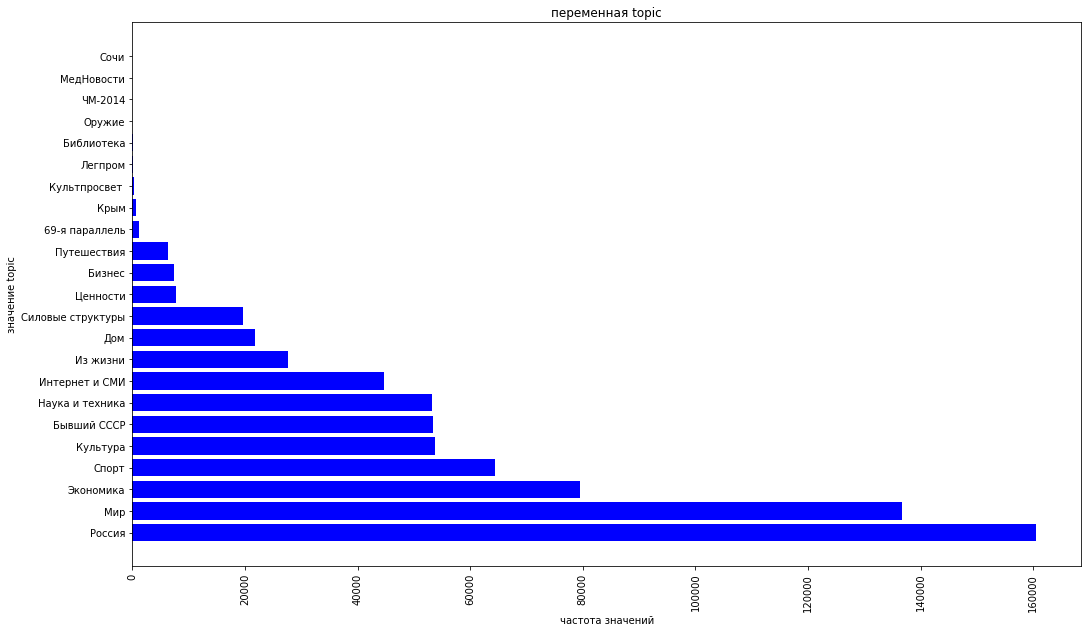

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(17, 10))
ax.barh(graph0_x, graph0_y, color ='b')
ax.set_title('переменная topic')
ax.set_ylabel('значение topic')
ax.set_xlabel('частота значений')
plt.xticks(rotation = 90)

plt.show()

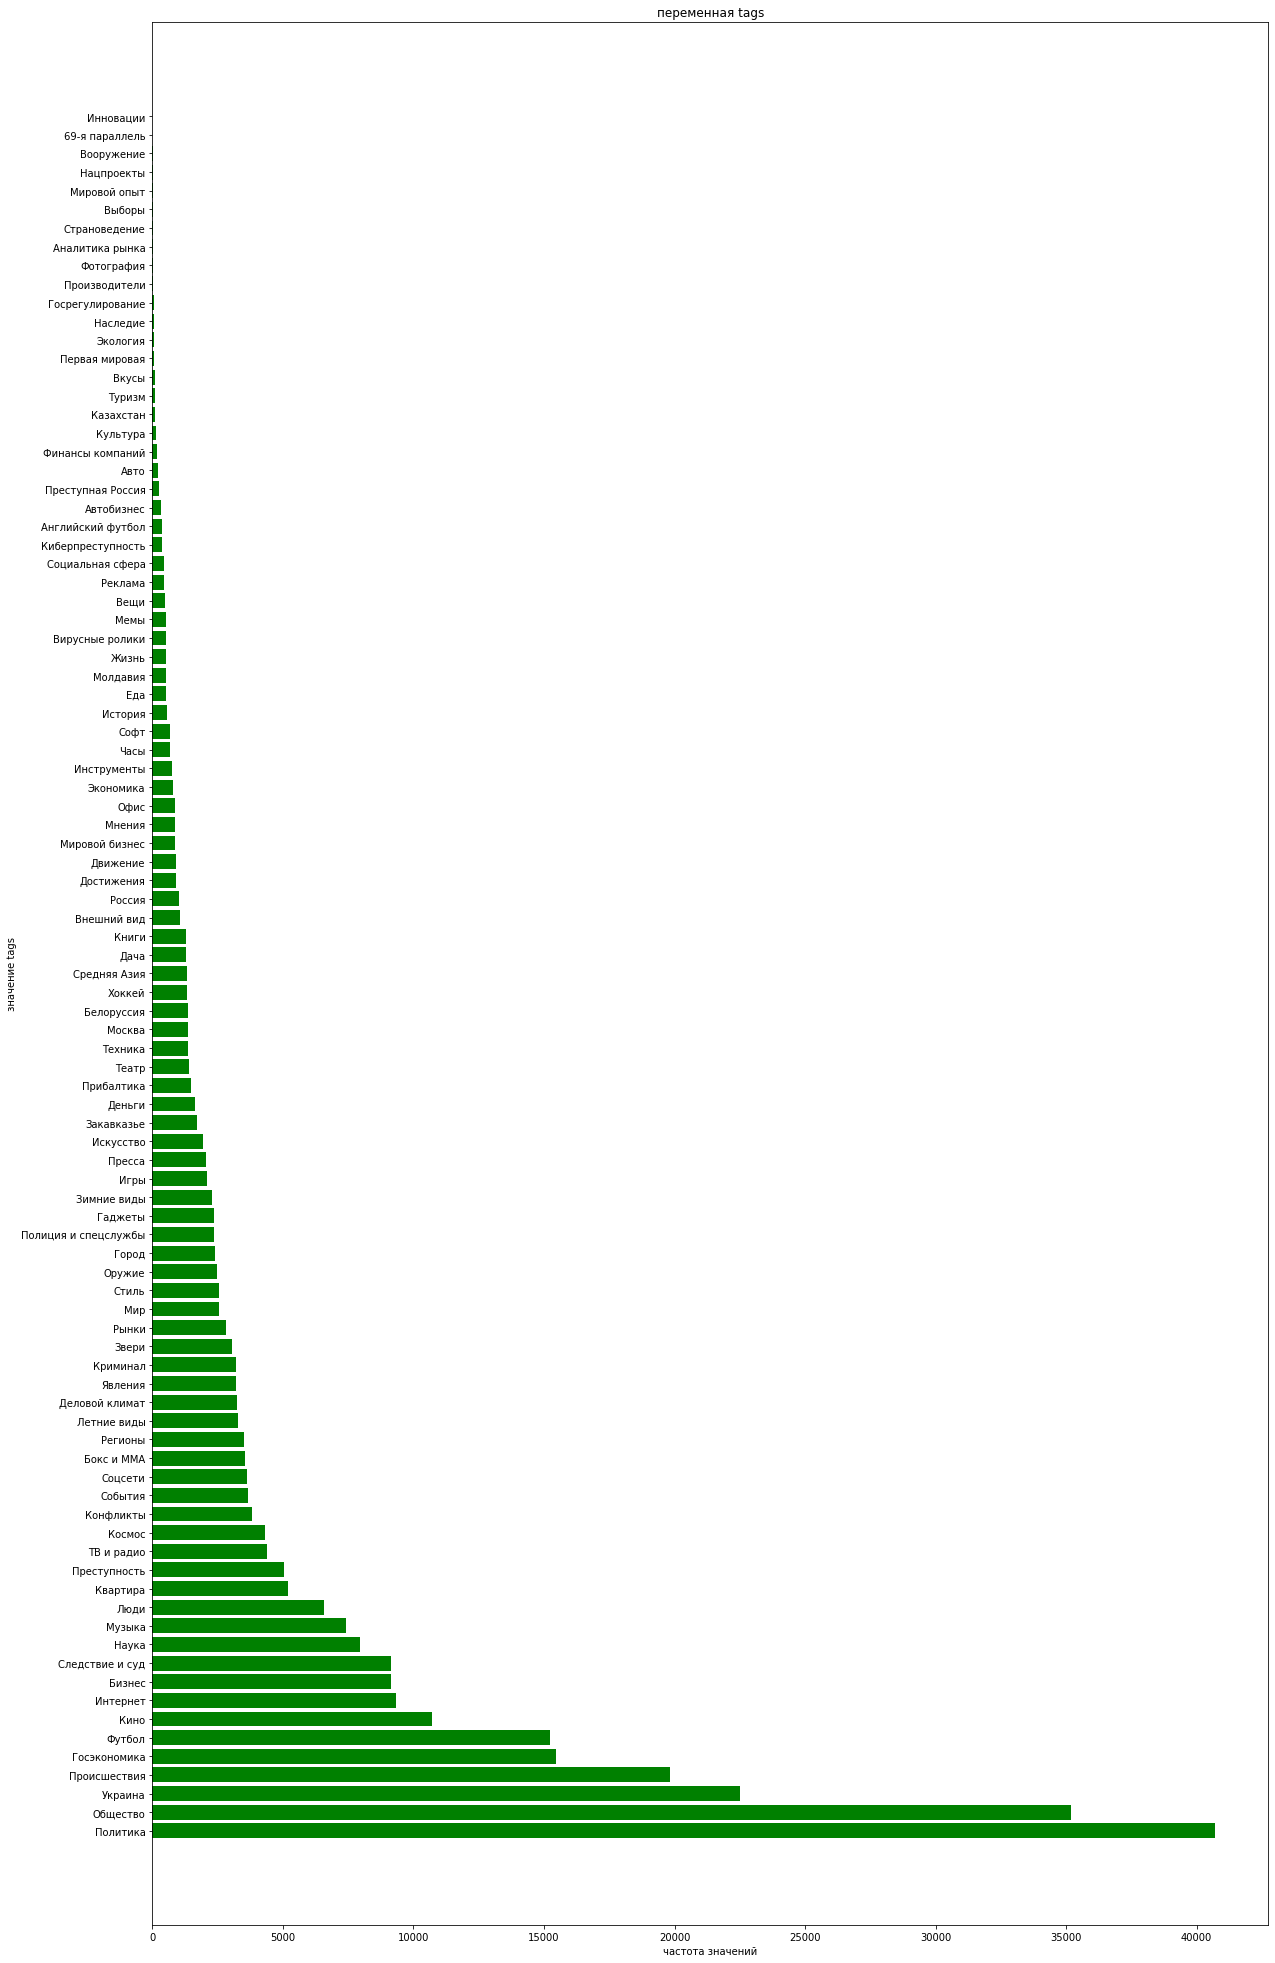

In [13]:
fig, ax = plt.subplots(figsize=(20, 35))
ax.barh(graph1_x, graph1_y, color ='g')
ax.set_title('переменная tags')
ax.set_ylabel('значение tags')
ax.set_xlabel('частота значений')

plt.show()

## Признак date

Как уже упоминалось выше, признак date в изначальном датасете представлен в типе object, поэтому переведем его в тип Datetime

In [14]:
df['date'] = pd.to_datetime(df['date'])

In [15]:
print(f"Дни с {min(df['date'].dt.date)} по {max(df['date'].dt.date)}, всего {df['date'].nunique()} дней.")

Дни с 1914-09-16 по 2019-12-14, всего 7393 дней.


Посмотрим на распределение новостей по годам

In [16]:
df['date'].dt.year.value_counts().sort_index()

1914        5
1999     3081
2000    16176
2001    21974
2002    22179
2003    21557
2004    24386
2005    30718
2006    35964
2007    36029
2008    50389
2009    51343
2010    44587
2011    44822
2012    46047
2013    43297
2014    38075
2015    44766
2016    63108
2017    58792
2018    43951
2019    59729
Name: date, dtype: int64

В период с 1914 до 1999 новостей нет, поэтому новости за 1914 год - выбросы, которые необходимо будет удалить при изучении изменения новостей во времени

Посмотрим на график распределения новостей без 1914 года

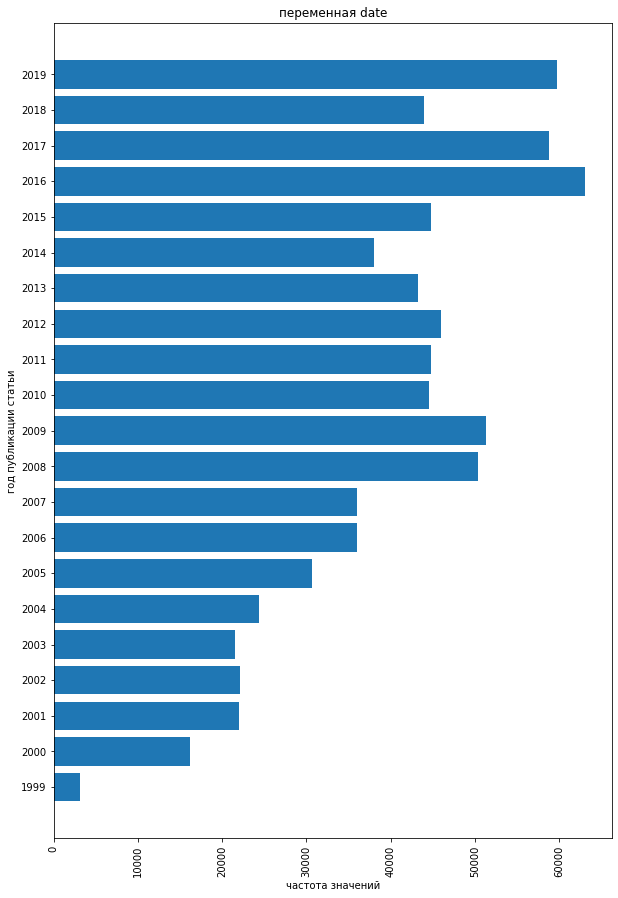

In [26]:
graph2_y = df[df['date'].dt.year != 1914]['date'].dt.year.value_counts().sort_index()
graph2_x = list(graph2_y.index.astype(str))

fig, ax = plt.subplots(1, 1, figsize=(10, 15))
ax.barh(graph2_x, graph2_y)
ax.set_title('переменная date')
ax.set_ylabel('год публикации статьи')
ax.set_xlabel('частота значений')
plt.xticks(rotation = 90)

plt.show()

Проверим, во все ли дни выходили новости в период с 31.08.1999 по 14.12.2019 (выбросные значения 1914г рассматривать не будем).

In [33]:
min(df[df['date'].dt.year != 1914]['date'])

Timestamp('1999-08-31 00:00:00')

In [34]:
missimg_date01 = pd.date_range(start='1999-08-31', end='2019-12-14')
missimg_date = missimg_date01.difference(df['date'])
missimg_date

DatetimeIndex(['1999-09-04', '1999-09-05', '1999-09-11', '1999-09-12',
               '1999-09-19', '1999-09-25', '1999-09-26', '1999-10-02',
               '1999-10-16', '1999-10-23', '1999-10-24', '1999-10-30',
               '1999-11-08', '1999-11-28', '2000-01-07', '2000-01-09',
               '2000-01-23', '2000-01-30', '2000-02-06', '2000-02-13',
               '2000-03-19'],
              dtype='datetime64[ns]', freq=None)

Можно заметить, что есть несколько дат в этом промежутке, которые в датасете не представлены. Даты относятся к 1999 и 2000г году.

## Признак text

In [27]:
print('Максимальная длина текста:', max(df['text'].str.len()))

Максимальная длина текста: 55387.0


In [28]:
print('Минимальная длина текста:', min(df['text'].str.len()))

Минимальная длина текста: 3.0


In [29]:
print('Средняя длина текста:', np.mean(df['text'].str.len()))

Средняя длина текста: 1332.309508470979


В данных есть странные тексты, состоящие из 3х символов. При обучении моделей они явно будут являться выбросами 

## Признак url

Проверим, что все наши новости действительно с сайта lenta.ru

In [30]:
df['url'].str.startswith('https://lenta.ru/').value_counts()

True    800975
Name: url, dtype: int64